# Azúcar y Sociedad

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
random.seed(10)

### Temas

- Agentes

### Wikipedia

All Sugarscape models include the agents (inhabitants), the environment (a two-dimensional grid) and the rules governing the interaction of the agents with each other and the environment.

The original model presented by J. Epstein & R. Axtell (considered as the first large scale agent model) is based on a 51x51 cell grid, where every cell can contain different amounts of sugar (or spice). In every step agents look around, find the closest cell filled with sugar, move and metabolize. They can leave pollution, die, reproduce, inherit sources, transfer information, trade or borrow sugar, generate immunity or transmit diseases - depending on the specific scenario and variables defined at the set-up of the model.

## Introducción

[**Sugarscape**](http://en.wikipedia.org/wiki/Sugarscape) es un modelo basado en agentes desarrollado por **Joshua M. Epstein** y **Robert Axtell**, presentado originalmente en _Growing Artificial Societies_. Consta de una rejilla 2D, en la que hay un bien abstracto, llamado `azucar`, los agentes vagan por la rejilla y acumulan `azúcar`.

El modelo original es el primer modelo de agentes a gran escala y ocurría en una rejilla de $51 \times 51$ celdas. En cada `step` los agentes miran alredor, encuentran la celda más cercana con `azúcar`, se mueven y metabolizan (tasa a la que consumen `azúcar`). La simulación puede ser complicada y se puede agregar que cada agente deje contaminación, se reproduzca, herede recursos, transfiera información, comercie, regale, transmita enfermedades, o haga la guerra. También es posible agregar un Gobierno que cobre impuestos cada determinado número de `steps` o que inclusive haya dos tipos de bien (en las simulaciones se llama `especia`).

## Preguntas a responder

- Cree un clase `Habitante` que herede de nuestra clase `Agente`, implemente el algoritmo de comportamiento comentado en la introducción. 
- Cree un clase `Sugarscape` que herede de nuestra clase `Mundo`. Representa mediante grados de color la fuerza del agente y la cantidad de azúcar en la celda.
- Cree una clase `Bien` que represente al `azúcar` de **Sugarscape**.
- Ejecuta una simulación sencilla, con agentes consumiendo recursos y acaparándolos. Inicializa los agentes con diferentes capacidades de almacenar azúcar, consumo de azúcar (metabolismo) y rango de visión.
- Grafica la [**curva de Lorenz**](http://en.wikipedia.org/wiki/Lorenz_curve) y el [**coeficiente de Gini**](http://en.wikipedia.org/wiki/Gini_coefficient), grafica también la población y la cantidad de azúcar. ¿Qué interpretación le das a las gráficas?
- Agrega un factor de regeneración del `azúcar`.
- Agrega un factor de reproducción asexual. (Si tiene suficiente energía, se divide en dos).
- Agrega que el agente muera por hambre.
- Agrega la `especia` al modelo, también es necesario para vivir. Su valor nutrimental es diferente al del `azúcar`.
- Agrega la habilidad de comerciar.
- Agrega una `tribu` al agente. 
- Agrega el comportamiento de que nuevos agentes sean creados cuando un agente muera.
- Agrega un tiempo de vida máximo.
- Agrega una variable `sexo`.
- Agrega reproducción sexual (Si está en su edad fértil, ambos tienen energía y le transmiten la mitad a su hijo).

### Pre-Solución

 Clases `Agente` y `Mundo` vistas en clase

In [17]:
class Agente:
    """ Agente general """
    def __init__(self, tipo, locacion = np.array([0,0])):
        self.tipo = tipo
        self.locacion = locacion
        self.siguiente_accion = None

    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  # Otra manera es usar np.sqrt(np.sum((a-b)**2))
    
    def vecinos(self, agentes):
        pass
        
    def actuar(self, agentes):
        self.locacion =  self.siguiente_accion

    def decidir(self, agentes):
        self.siguiente_accion = np.array([random.randint(0, 51), random.randint(0, 51)]) # Toma una nueva posición al azar
    
    def actualizar(self, agentes):
        self.decidir(agentes)
        self.actuar(agentes)

In [18]:
class Mundo:
    def __init__(self, agentes, ancho = 5, alto = 5, steps = 10):
        self.agentes = agentes
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        
        print ("Creado el mundo")
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 4, 'alpha' : .6}
        self.puntos, = self.ax.plot([], [], 'o', **plot_args)
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames = self.steps, interval = 1000, blit = False)
        return anim

Creado el mundo


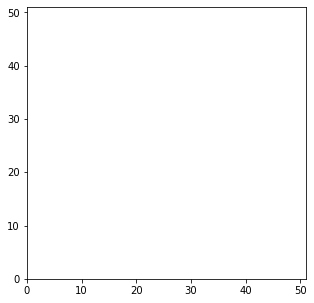

In [19]:
num_agentes = 250

agentes_simples = [Agente(tipo = 2) for i in range(num_agentes)]



sin_chiste = Mundo(agentes = agentes_simples, steps = 10)


simulacion = sin_chiste.simular()

In [20]:
HTML(simulacion.to_html5_video())

Un ejemplo de aplicación visto en clase

In [25]:
class AgenteSchelling(Agente):
    
    def __init__(self, tipo, homofilia = 5, vecinos = 7):
        Agente.__init__(self, tipo)
        self.homofilia = homofilia
        self.vecinos = vecinos # Quienes son mis vecinos
        self.feliz = False
        self.locacion = np.array([random.uniform(0, 51), random.uniform(0, 51)]) # Posición al azar inicial
        
    def actuar(self, agentes):
        self.locacion = np.array([random.uniform(0, 51), random.uniform(0, 51)]) # Brinco a una nueva posición
        
    def decision(self, agentes):
        """Verdadero si un número suficiente de vecinos cercanos es del mismo tipo."""
        distancias = []
        # Distancias es una lista de pares (distancia, agente)
        for agente in agentes:
            if self != agente:
                distancia = self.distancia(agente)
                distancias.append((distancia, agente))
        # Ordenamos del más cercano al más lejano 
        distancias.sort()
        vecinos = [agente for dist, agente in distancias[:self.vecinos]]
        # Contamos cuantos vecinos son del mismo tipo 
        num_mismo_tipo = sum(self.tipo == agente.tipo for agente in vecinos)
        
        self.feliz = (num_mismo_tipo >= self.homofilia)
        
        return self.feliz

    def actualizar(self, agentes):
        """Si no está feliz, escoge una posición nueva al azar, sólo se detiene cuando está feliz."""
        self.decision(agentes)
        if not self.feliz:
            self.actuar(agentes) # No estaba feliz en la ultima ronda
            

            

In [26]:
class MundoSchelling(Mundo):
    
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos_0, = self.ax.plot([], [], 'o', markerfacecolor='orange', **plot_args)
        self.puntos_1, = self.ax.plot([], [], 'o', markerfacecolor='green', **plot_args)
    
    def clean_screen(self):
        self.puntos_0.set_data([], [])
        self.puntos_1.set_data([], [])
        return 
    
    def dibujar(self,step):
   
        x_values_0, y_values_0 = [], []
        x_values_1, y_values_1 = [], []
    
        for agente in self.agentes:
            x, y = agente.locacion
            if agente.tipo == 0:
                x_values_0.append(x)
                y_values_0.append(y)
            else:
                x_values_1.append(x)
                y_values_1.append(y)

                
        self.puntos_0.set_data(x_values_0, y_values_0)
        self.puntos_1.set_data(x_values_1, y_values_1)
        
        self.ax.set_title('Paso {}'.format(step))

        return 

Creado el mundo


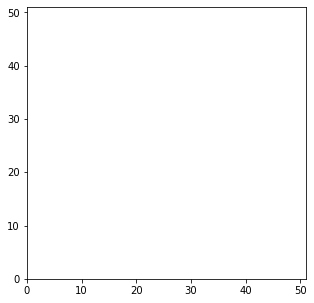

In [27]:
num_tipo_0 = 200
num_tipo_1 = 200

agentes = [AgenteSchelling(tipo=0) for i in range(num_tipo_0)]
agentes.extend(AgenteSchelling(tipo=1) for i in range(num_tipo_1))


schelling_world = MundoSchelling(agentes = agentes, steps = 30)

simu_schelling = schelling_world.simular()

In [28]:
HTML(simu_schelling.to_html5_video())

### Solución

`get_coords` toma las dimeniones de la rejilla, $51x51$, y regresa un array donde cada elemento del array es una cordenada de la rejilla. 

In [35]:
def get_coords(n, m):
    """
    Hace un np.array donde cada elemento del array es el índice de una n x m rejilla
    """
    t = [(i, j) for i in range(n) for j in range(m)]
    return np.array(t)

`make_visible_coords` toma el rango de la visión del agente y regresa un array donde cada elemento del arrat es la coordenada de una casilla visible para el agente. 

Recordemos que los movimientos son Norte-Sur-Este-Oeste

In [51]:
def make_possible_coords(vision):
    """
    Calcula los posibles movimientos de los agentes dependiendo de su visión
    """
    def make_mov(punto):
        mov = np.array([[-punto, 0], [punto, 0], [0, -punto], [0, punto]])
        return mov
                     
    movimientos = [make_mov(mov) for mov in range(1, vision+1)]
    return np.vstack(arrays)

In [81]:
position = np.array([2,2])
locs = make_possible_coords(2)
print((locs + position))

[[1 2]
 [3 2]
 [2 1]
 [2 3]
 [0 2]
 [4 2]
 [2 0]
 [2 4]]


In [96]:
otra = (locs + position)

In [107]:
class Habitante(Agente):
    def __init__(self, grid = 51, agentes):
        
    """
    Inicialización de atributos.
    n –> número de filas y columnas
    """
        Agente.__init__(self, tipo)
        self.metabolismo = random.uniform(1,4)
        self.vision = random.randint(1,6)
        self.grid = grid
        self.agentes = agentes
        self.make_agents_coords()
    
    def make_agents_coords(self):
    """  
    Hacemos coordenadas para cada casilla de la rejilla y 
    las mezclamos para que sea al azar en dónde aparezca por 
    primera vez el agente.
    """
        coords = get_coords(self.grid, self.grid)
        np.random.shuffle(coords)
        self.position = [coords[i] for i in range(self.agentes)]
        
    # Track de cuales casillas están ocupadas por los agentes y las que están vacías
        self.ocupadas = [i for i in self.positions]
        self.free = [i for i in self.positions if i not in self.ocupadas]

        
    def look_and_move(self):
    """
    Dada la posición y la visión que tiene el agentee, se busca la casilla que
    tenga más azúcar. Regresa las coordenadas de la mejor casilla.  
    """
    # Encontramos todas las casillas visibles.
        self.locs = make_possible_coords(self.vision)
        self.locs = (self.locs + self.position)
        
    # Si todas las casillas visibles están vacías, no te muevas.
        if len(self.empty) == 0:
            return self.position
        
    # Buscamos el nivel de azúcar en cada casilla, dado que la casilla esté vacía (no haya agentes)
    # Encontramos la casilla que tenga más azúcar de todas y la regresamos
    # Usemos np.argmax()
    # OBS. En el caso de un empate, se supone que argmax regresa la primera coordenada
    # que esté más cerca (es un tipo dee random)
    
        ????????????????????????????????????????????????????????
        
    def cosechar(self):
    
    # Cosechar toma la (nueva) ubicación del agente, y elimina y devuelve
    # el azúcar en ese lugar con la función.
        ???????????????????????????????????
    
    def actuar(self):
    """
    Actuar. 
    1. Identifica el lugar (o lugares) NO ocupado que tenga más azúcar.
    2. Muévete a ese nuevo sitio
    3. Colecciona toda el azúcar que te sea posible por tu metabolismo en la nueva posición.
    4. Incrementa la riqueza acumulada del agente por el azúcar coleccionada (lo que se ha cosechado)
       y disminuye la taza del metabolismo del agente. 
    """  
        
        self.localizacion = self.look_and_move(self.locs, self.vision)
        self.sugar += self.cosechar(self.??) - self.metabolism
    
    def step(self):
        # Hacemos el proceso de los agentes al azar
        random_order = np.random.permutation(self.agents)
        for agent in random_order:
            
            # mark the current cell unoccupied
            self.occupied.remove(agent.loc)
            
            # execute one step
            agent.actuar(self)
        
        # grow back some sugar
        self.grow()
        return len(self.agents)

IndentationError: expected an indented block (<ipython-input-107-de2c345956dc>, line 7)

In [ ]:
class Sugarscape(Mundo):
    def __init__(self):
        

In [ ]:
class Bien(Habitante, Sugarscape):
    def __init__(self, growth_rate = 1, max_sugar = 25):
        self.capacity = random.randint(5,25)
        self.growth_rate = growth_rate
        self.max_sugar = max_sugar        

    def grow_sugar(self):
        
        """"
        Agregamos azúcar a todas las celdas con un growth_rate de 1, 
        tomando en cuenta lo que ya se tiene de azúcar.
        
        Tomamos el mínimo entre su capacidad y el max_sugar ya que puede
        que con el growth_rate se pase. Así aseguramos que no.
    
        """"
        self.array = np.minimum(self.capacity + self.growth_rate, self.max_sugar)
    


## Preguntas adicionales

- ¿Qué pasa si la variable `tribu` afecta el comercio y el sexo? ¿Cómo lo simularías y por qué?
- ¿Cómo simularías **guerra primitiva**?
- ¿Cómo simularías **enfermedad**?
- ¿Quieres incluir **genética**? 
    - Define una cadena binaria (i.e. de ceros y unos) en los que se estén codificadas el sexo, capacidad de almacenar azúcar, metabolismo, rango de visión.
    - Cuando los agentes se reproduzcan sexualmente, realiza un [`crossover`](http://en.wikipedia.org/wiki/Crossover_(genetic_algorithm)) para determinar los atributos de los agentes de la siguiente generación.
- Agrega una asimetría de sexo, esto lo puedes modelar con un `offspring_cost` que sea mayor para uno de los sexos. Entonces antes de reproducirse sexualmente, hay una decisión por parte de los agentes.

## Bibliografía

- **Epstein, Joshua M.; Axtell, Robert** (October 11, 1996). _Growing artificial societies: social science from the bottom up_. `Brookings Institution Press. p. 224. ISBN 978-0-262-55025-3.`
- **Wikipedia** [_Sugarscape_](http://en.wikipedia.org/wiki/Sugarscape)